In [186]:
# import the libraries

import gensim
from gensim import corpora, models, similarities
from gensim.models.word2vec import Word2Vec

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
# load the error file, set the columns

df = pd.DataFrame([['sbl-043-ryr every request timed out'],['sbl-343-red unknown error'],['sbl-343-red first error one'],['sbl-343-fro second error two'],['invalid response code 005'],['sbl-003-iyr is not an error code'],['sbl-445-hfr request could not be processed'],['sbl-023-ryr new request timed out'],['sbl-143-red bayar error'],['sbl-776-red local hopi error brusque'],['sbl-009-gif image not loaded error two'],['valid response code 434'],['sbl-221-des is a callout and an error code'],['sbl-112-drf request could not be validated'],['sbl-743-ryr unsuccessful request timed out'],['sbl-373-red known error invalid save'],['sbl-377-red first error one'],['sbl-873-fro second error two'],['invalid response code 332'],['sbl-212-rff is used for importing files. key save error'],['sbl-455-dff ftp request could not be processed on time, save error'],['sbl-223-ryr custom request timed out'],['sbl-132-cyy zephyr error'],['sbl-677-red local hopi error indicates low memory'],['sbl-767-bmp image not loaded error 404'],['valid response code 233 does not record'],['sbl-990-des is an unknown callout and a valid error code'],['sbl-911-drf http request could not be revalidated']])

df.columns = ['error']

In [188]:
# data exploration

df.head()

,error
0,sbl-043-ryr every request timed out
1,sbl-343-red unknown error
2,sbl-343-red first error one
3,sbl-343-fro second error two
4,invalid response code 005


In [189]:
# getting the list of words
words = df['error'].tolist()

In [190]:
words

['sbl-043-ryr every request timed out',
 'sbl-343-red unknown error',
 'sbl-343-red first error one',
 'sbl-343-fro second error two',
 'invalid response code 005',
 'sbl-003-iyr is not an error code',
 'sbl-445-hfr request could not be processed',
 'sbl-023-ryr new request timed out',
 'sbl-143-red bayar error',
 'sbl-776-red local hopi error brusque',
 'sbl-009-gif image not loaded error two',
 'valid response code 434',
 'sbl-221-des is a callout and an error code',
 'sbl-112-drf request could not be validated',
 'sbl-743-ryr unsuccessful request timed out',
 'sbl-373-red known error invalid save',
 'sbl-377-red first error one',
 'sbl-873-fro second error two',
 'invalid response code 332',
 'sbl-212-rff is used for importing files. key save error',
 'sbl-455-dff ftp request could not be processed on time, save error',
 'sbl-223-ryr custom request timed out',
 'sbl-132-cyy zephyr error',
 'sbl-677-red local hopi error indicates low memory',
 'sbl-767-bmp image not loaded error 404'

In [191]:
# import tokenizer or split using Python

from nltk import word_tokenize as wt

In [192]:
tokens = [wt(word) for word in words]

In [193]:
tokens

[['sbl-043-ryr', 'every', 'request', 'timed', 'out'],
 ['sbl-343-red', 'unknown', 'error'],
 ['sbl-343-red', 'first', 'error', 'one'],
 ['sbl-343-fro', 'second', 'error', 'two'],
 ['invalid', 'response', 'code', '005'],
 ['sbl-003-iyr', 'is', 'not', 'an', 'error', 'code'],
 ['sbl-445-hfr', 'request', 'could', 'not', 'be', 'processed'],
 ['sbl-023-ryr', 'new', 'request', 'timed', 'out'],
 ['sbl-143-red', 'bayar', 'error'],
 ['sbl-776-red', 'local', 'hopi', 'error', 'brusque'],
 ['sbl-009-gif', 'image', 'not', 'loaded', 'error', 'two'],
 ['valid', 'response', 'code', '434'],
 ['sbl-221-des', 'is', 'a', 'callout', 'and', 'an', 'error', 'code'],
 ['sbl-112-drf', 'request', 'could', 'not', 'be', 'validated'],
 ['sbl-743-ryr', 'unsuccessful', 'request', 'timed', 'out'],
 ['sbl-373-red', 'known', 'error', 'invalid', 'save'],
 ['sbl-377-red', 'first', 'error', 'one'],
 ['sbl-873-fro', 'second', 'error', 'two'],
 ['invalid', 'response', 'code', '332'],
 ['sbl-212-rff',
  'is',
  'used',
  'for'

In [194]:
# you can remove stopwords here

In [195]:
# removing duplicates from the list of words 

flat_tokens = [item for sublist in tokens for item in sublist]

In [196]:
flat_tokens = list(set(flat_tokens))

In [197]:
flat_tokens

['ftp',
 'memory',
 'sbl-043-ryr',
 'valid',
 'for',
 'sbl-023-ryr',
 'request',
 'first',
 'unsuccessful',
 'sbl-767-bmp',
 'sbl-990-des',
 'new',
 'low',
 'importing',
 'used',
 'sbl-343-red',
 'indicates',
 'out',
 'a',
 'files',
 'sbl-373-red',
 'sbl-455-dff',
 'custom',
 'second',
 'validated',
 'known',
 'every',
 'be',
 'bayar',
 'sbl-003-iyr',
 'is',
 'processed',
 'code',
 'sbl-377-red',
 '233',
 'sbl-873-fro',
 'sbl-911-drf',
 'http',
 'invalid',
 'hopi',
 'sbl-445-hfr',
 '.',
 'not',
 'sbl-223-ryr',
 '005',
 'sbl-132-cyy',
 'sbl-677-red',
 '404',
 'brusque',
 '434',
 'zephyr',
 'unknown',
 'sbl-343-fro',
 'image',
 'and',
 'callout',
 'key',
 'time',
 'sbl-743-ryr',
 'timed',
 'local',
 'sbl-776-red',
 ',',
 'sbl-221-des',
 'sbl-009-gif',
 'save',
 'two',
 'sbl-212-rff',
 'record',
 'does',
 'loaded',
 'an',
 'on',
 'sbl-112-drf',
 'error',
 'one',
 '332',
 'revalidated',
 'sbl-143-red',
 'response',
 'could']

In [198]:
# building the W2V model
model = Word2Vec(tokens, min_count=1, size=1)

In [199]:
model

In [200]:
model.wv.__getitem__('one')

array([-0.0480867], dtype=float32)

In [201]:
model.wv.most_similar('code')

E:\Python\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('importing', 1.0),
 ('on', 1.0),
 ('005', 1.0),
 ('sbl-143-red', 1.0),
 ('sbl-776-red', 1.0),
 ('sbl-221-des', 1.0),
 ('sbl-112-drf', 1.0),
 ('unsuccessful', 1.0),
 ('known', 1.0),
 ('sbl-873-fro', 1.0)]

In [202]:
word_vectors = model.wv

In [203]:
word_vectors

In [204]:
# preparing the training data

train = []

for word in flat_tokens:
    train.append([word, model.wv.__getitem__(word)[0]])

In [205]:
train

[['ftp', 0.09699862],
 ['memory', -0.25722605],
 ['sbl-043-ryr', -0.4848653],
 ['valid', 0.4797438],
 ['for', 0.0009840961],
 ['sbl-023-ryr', 0.15249217],
 ['request', 0.43649182],
 ['first', 0.117216945],
 ['unsuccessful', -0.27371132],
 ['sbl-767-bmp', 0.3561648],
 ['sbl-990-des', -0.49927813],
 ['new', 0.15923135],
 ['low', 0.3748299],
 ['importing', -0.43606132],
 ['used', -0.13675109],
 ['sbl-343-red', -0.4412164],
 ['indicates', -0.3467991],
 ['out', -0.090446636],
 ['a', 0.032914184],
 ['files', 0.09165523],
 ['sbl-373-red', 0.25481045],
 ['sbl-455-dff', -0.103315085],
 ['custom', -0.32870284],
 ['second', 0.29332328],
 ['validated', 0.37151366],
 ['known', -0.041882485],
 ['every', 0.35633367],
 ['be', -0.34071153],
 ['bayar', 0.15009372],
 ['sbl-003-iyr', 0.224773],
 ['is', -0.31170553],
 ['processed', -0.42786953],
 ['code', -0.32309696],
 ['sbl-377-red', 0.39985475],
 ['233', 0.28544736],
 ['sbl-873-fro', -0.48013705],
 ['sbl-911-drf', 0.034610827],
 ['http', -0.15877077],
 

In [206]:
# creating the dataframe 

mdf = pd.DataFrame(train)

In [207]:
mdf.columns = ['word','vector']

In [208]:
# use custom fuction to classify 
# can be based on error count

mdf.loc[mdf['vector'] >= 0, 'class'] = 1
mdf.loc[mdf['vector'] < 0, 'class'] = -1

In [209]:
mdf.head()

,word,vector,class
0,ftp,0.096999,1.0
1,memory,-0.257226,-1.0
2,sbl-043-ryr,-0.484865,-1.0
3,valid,0.479744,1.0
4,for,0.000984,1.0


In [210]:
mdf['class'].describe()

count    81.000000
mean      0.061728
std       1.004312
min      -1.000000
25%      -1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: class, dtype: float64

In [211]:
mdf['class'].unique(), mdf['class'].value_counts()

(array([ 1., -1.]),  1.0    43
 -1.0    38
 Name: class, dtype: int64)

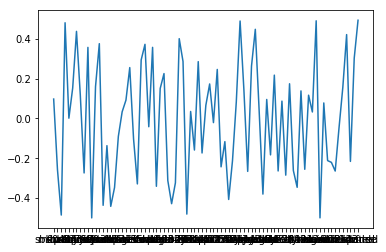

In [212]:
plt.plot(mdf['word'], mdf['vector'])

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
mdf_c = mdf[['vector', 'class']]

In [215]:
mdf_c

,vector,class
0,0.096999,1.0
1,-0.257226,-1.0
2,-0.484865,-1.0
3,0.479744,1.0
4,0.000984,1.0
5,0.152492,1.0
6,0.436492,1.0
7,0.117217,1.0
8,-0.273711,-1.0
9,0.356165,1.0


In [216]:
target = mdf_c['class']

In [217]:
target

0     1.0
1    -1.0
2    -1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8    -1.0
9     1.0
10   -1.0
11    1.0
12    1.0
13   -1.0
14   -1.0
15   -1.0
16   -1.0
17   -1.0
18    1.0
19    1.0
20    1.0
21   -1.0
22   -1.0
23    1.0
24    1.0
25   -1.0
26    1.0
27   -1.0
28    1.0
29    1.0
     ... 
51   -1.0
52    1.0
53    1.0
54    1.0
55   -1.0
56    1.0
57   -1.0
58    1.0
59   -1.0
60    1.0
61   -1.0
62    1.0
63   -1.0
64   -1.0
65    1.0
66   -1.0
67    1.0
68    1.0
69    1.0
70   -1.0
71    1.0
72   -1.0
73   -1.0
74   -1.0
75   -1.0
76    1.0
77    1.0
78   -1.0
79    1.0
80    1.0
Name: class, Length: 81, dtype: float64

In [218]:
train_data, test_data, train_target, test_target = train_test_split(mdf_c, target, test_size = 0.25) 

In [219]:
train_data

,vector,class
32,-0.323097,-1.0
24,0.371514,1.0
30,-0.311706,-1.0
17,-0.090447,-1.0
1,-0.257226,-1.0
57,-0.183033,-1.0
12,0.374830,1.0
62,0.173678,1.0
2,-0.484865,-1.0
14,-0.136751,-1.0


In [220]:
from sklearn import svm

In [221]:
ocsvm_mdl = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=0.00005)  
ocsvm_mdl.fit(train_data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=5e-05, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [222]:
from sklearn import metrics

In [223]:
# accuracy / predictions

preds = ocsvm_mdl.predict(train_data)  
targs = train_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.36666666666666664
precision:  0.0
recall:  0.0
f1:  0.0
area under curve (auc):  0.40740740740740744


In [224]:
# test data

preds = ocsvm_mdl.predict(test_data)  
targs = test_target

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))

accuracy:  0.47619047619047616
precision:  0.0
recall:  0.0
f1:  0.0
area under curve (auc):  0.45454545454545453
